
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jenglick/QuantumTutorials/blob/master/ProgramQuantumAlgorithms.ipynb)



In [ ]:
!pip install qiskit-aqua==0.4.0
!git clone https://github.com/jenglick/QuantumTutorials.git
%cd QuantumTutorials
%load think.py
from think import *

<img src="figs/hello2.png" width="1500 px" align="center">

<img src="figs/qiskit-panels.png" width="1500 px" align="center">


<img src="figs/aqua.png" width="1500 px" align="center">

# Quantum computers can be used to learn and classify data. <br>Today, we will program a quantum computer to classify this data with Aqua.

<img src="figs/great-demo.png" width="1300 px" align="center">



# Suppose we want to classify the following data. <br>By drawing a line separating the classes, we can assign labels to <br>new data points based on which side of the line they are found.

<img src="figs/clusters.png" width="700 px" align="center">

# Not any line will do. We want an optimal hyperplane to separate the data. <br>This is the task of a support vector machine.

<br>

<img src="figs/hyperplane.png" width="850 px" align="center">

# Often, the data is not linearly separable. <br>It may become linearly separable by increasing dimensionality. <br>This is done using a feature map.

<br>

<img src="figs/featuremap.png" width="650 px" align="center">

# Let's create our own dataset using Qiskit Aqua to test these ideas.

Note: with Aqua, you can try other datasets such as those from `sklearn.datasets`. 

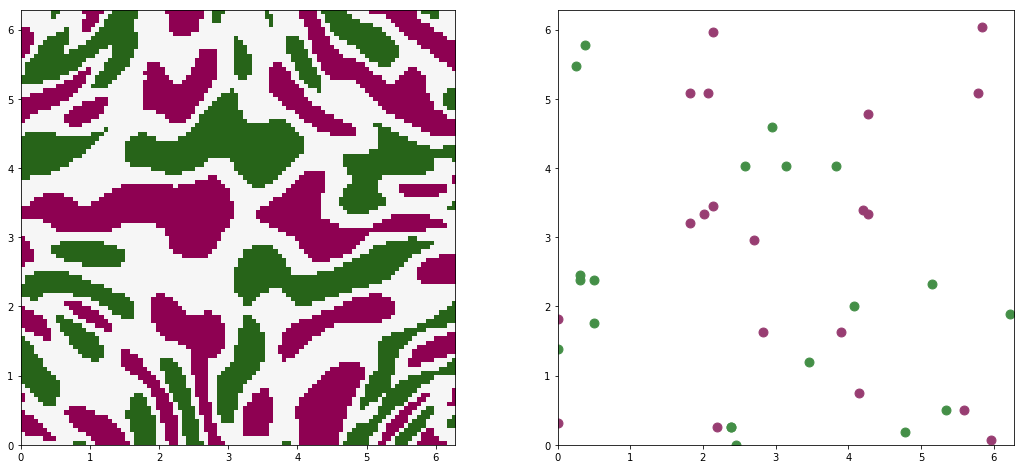

In [4]:
number_of_features = 2  # number of features
training_size = 20      # size of training set
test_size = 10          # size of test set
gap = 0.3               # separation between the two classes

my_data = read(number_of_features, training_size, test_size, gap) # create the training and testing sets


<br><br><br><br>

<br><br><br><br>

<br><br><br><br>

<br><br><br><br>


# So, how do we find the margin-maximizing hyperplane for our dataset? 

This is equivalent to minimizing $||\vec{w}||^2$ with the constraint that data points lie on the correct side of the margin.

<img src="figs/primal.png" width="1000 px" align="center">

# This can be rewritten in its dual form by solving these two equations:

<img src="figs/critical-points.png" width="350 px" align="center">


<img src="figs/dual.png" width="1500 px" align="center">

# We can use quantum-enhanced feature spaces to classify data.

**arXiv:1804.11326 (2018)**. V. Havlicek,  A. D. Córcoles, K. Temme, A. W. Harrow, J. M. Chow, J. M. Gambetta


<br>

<img src="figs/quantum_featuremap.png" width="1200 px" align="center">

<img src="figs/quantum-advantage.png" width="1500 px" align="center">

# Here is one way we can build a quantum circuit representing <br>the quantum feature map:

<!--
- Note: The classical data is encoded in the quantum state space via the parameters $\phi_{\{𝑖\}} = x_i$ and $\phi_{\{ij\}} = (\pi − x_i)(\pi - x_j)$
-->

In [5]:
def feature_map(register, num_of_qubits, circuit_depth, input_vector):
    """The feature map based on arXiv:1804.11326.
        Args:
            register (QuantumRegister): register of qubits
            num_of_qubits (int): number of qubits/features
            circuit_depth (int): number of layers in the feature map
            input_vector (array): the classical input vector
        Returns:
            trial_circuit (QuantumCircuit): circuit representing the quantum feature map
        """
    circuit = QuantumCircuit(register)  # create a quantum circuit
    entangler_map = {0: [1]}            # specify the coupling between qubits
    
    for depth in range(circuit_depth):
        for r in range(num_of_qubits):

            circuit.h(register[r]) # hadamard gate
            circuit.u1(2 * input_vector[r], register[r]) # Rz gate
        
        for node in entangler_map:
            for j in entangler_map[node]:
        
                circuit.cx(register[node], register[j]) # controlled-NOT gate
                circuit.u1(2 * (np.pi - input_vector[node]) * (np.pi - input_vector[j]), register[j])
                circuit.cx(register[node], register[j])

    return circuit

# This is the circuit we just constructed for a given input vector:

<br>

\begin{equation}
\vec{x} = [\pi/4, \pi/12]
\end{equation}

<br>

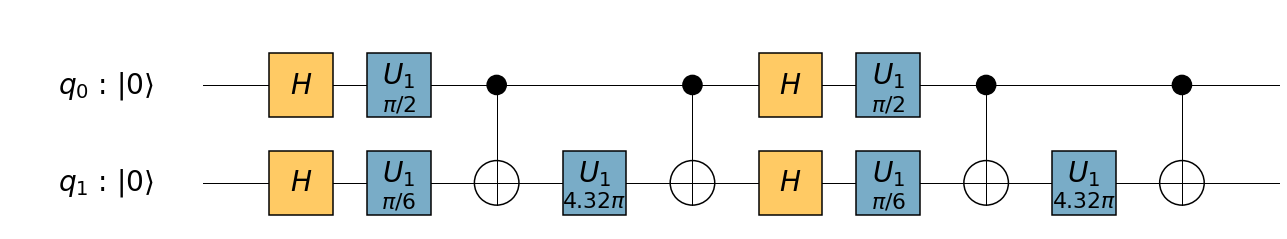

In [6]:
x = [np.pi/4, np.pi/12]      # two-dimensional input vector

q = QuantumRegister(2, 'q')  # two-qubit quantum register

circuit = feature_map(register=q, num_of_qubits=2, circuit_depth=2, input_vector=x) # the feature map circuit
circuit.draw(output='mpl', style = style) # visualize the circuit

# Actually, we don't even need to directly code the <br>quantum feature map ourselves. <br><br>Using Aqua, we can configure it in one line:

<br>

In [7]:
feature_map = SecondOrderExpansion(num_qubits=2, depth=2)


<br><br>

Note: 

- `SecondOrderExpansion` has default parameters $\phi_{\{i\}} = x_i$,  $\phi_{\{ij\}} = (\pi - x_i)(\pi - x_j)$


- If your dataset has more features, increase the value of `num_qubits` accordingly.


- Other feature maps are available in Aqua, including `FirstOrderExpansion`, `PauliExpansion`, or you can create your own.

# Now that we have specified the quantum feature map, <br>we can build the kernel matrix.

<br>

<img src="figs/kernel.png" width="1300 px" align="center">

# With Aqua, we can solve the full problem in a few lines of code.

Testing Accuracy: 1.0


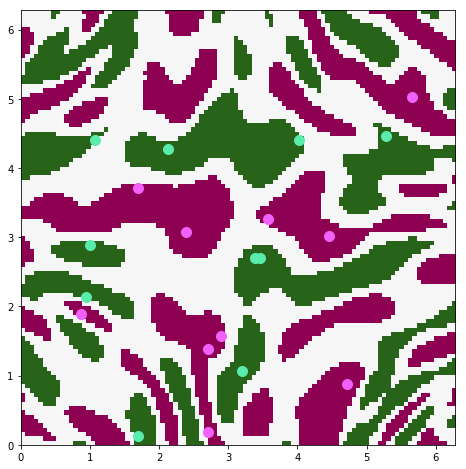

In [8]:
# Build the kernel matrix
qsvm = QSVMKernel(feature_map = feature_map,
                  training_dataset = my_data[0], test_dataset = my_data[1], datapoints = my_data[2][0])

# Specify the backend
backend = BasicAer.get_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend)

# Use the kernel matrix to find the support vectors and classify new data
result = qsvm.run(quantum_instance)

print("Testing Accuracy:", result['testing_accuracy'])
plot_results(my_data = my_data, result = result)


<br><br><br><br>

<br><br><br><br>

<br><br><br><br>

<br><br><br><br>

# Where to get this notebook:

# https://github.com/jenglick/QuantumTutorials

<br>

Another version of this notebook is available in the Qiskit Tutorials repo at https://github.com/qiskit/qiskit-tutorial <br><br>
Contributors: Vojtech Havlicek, Kristan Temme, Antonio Córcoles, Peng Liu, Richard Chen, Marco Pistoia, and Jay Gambetta.

# Where to learn more about getting started with Qiskit:

# https://learnqiskit.org

<br>
<br>
